# Attacking the networks 
- using (random, degree, betweenness, closeness, and clustering based edges weight)

In [1]:
import networkx as nx
import os
import random
datasets = ["\dolphins\dolphins.gml",
            "\polbooks\out2.txt",
            "\word_adjacencies.gml\word_adjacencies.gml",
            "\\arenas-email\\out2.txt",
            "Karate",
            "Erdos Renyi",
            "\\USAir97\\USAir97.mtx", 
            "\\circuits\s208_st.txt",
            "\\circuits\s420_st.txt",
            "\\circuits\s838_st.txt",
            "\\E. Coli\E. Coli.txt",
            "Barabasi_albert_graph",
            "\\facebook\\0.edges",
            "\\facebook\\107.edges",
            "\\facebook\\348.edges",
            "\\facebook\\414.edges",
            "\\facebook\\686.edges",
            "\\facebook\\1684.edges",
            "\\bio-celegans\\bio-celegans.mtx",
            "\\bn-macaque-rhesus_brain_2\\bn-macaque-rhesus_brain_2.txt",
            '\\soc-tribes\\soc-tribes.txt',
            '\\fb-pages-food\\fb-pages-food.txt',
            '\\bn-cat-mixed-species_brain_1\\bn-cat-mixed-species_brain_1.txt',
            '\\ca-sandi_auths\\ca-sandi_auths.mtx',
            '\\soc-firm-hi-tech\\soc-firm-hi-tech.txt']

def read_graph2(g):
    file_name = 'standard networks dataset' + datasets[int(g)]
    print(file_name)
    G = nx.Graph()
    if g==4:
        G = nx.karate_club_graph()
    elif g==5:
        # nodes = int(input("enter number of nodes?"))
        # edges= int(input("enter number of edges?"))
        G = nx.gnm_random_graph(500, 1500)
    elif g==11:
        # nodes = int(input("enter number of nodes?"))
        # edges= int(input("enter number of edges?"))
        # p = int(input("enter P value?"))
        G = nx.barabasi_albert_graph(500, 3)
    else:
        ext = os.path.splitext(file_name)[1]
        if ext=='.edges':
            G = nx.read_adjlist(file_name, create_using = nx.Graph(), nodetype = int)
        elif ext=='.gml':
            G = nx.read_gml(file_name)
        elif ext=='.mtx':
            G = None
            #matrix = scipy.io.mmread(file_name)
            #G = nx.from_scipy_sparse_matrix(matrix)
        elif ext=='.txt':
            file = open(file_name, 'r')
            lines=  file.readlines()
            G = nx.Graph()
            for line in lines:
                if " " in line:
                    N = line.split(" ")
                else:
                    N = line.split("\t")
                G.add_edge(N[0], N[1])
    return G

# read the networks
networks = {}
for net in range(len(datasets)):
    g = read_graph2(net)
    if g:
        networks[datasets[net]] = g


standard networks dataset\dolphins\dolphins.gml
standard networks dataset\polbooks\out2.txt
standard networks dataset\word_adjacencies.gml\word_adjacencies.gml
standard networks dataset\arenas-email\out2.txt
standard networks datasetKarate
standard networks datasetErdos Renyi
standard networks dataset\USAir97\USAir97.mtx
standard networks dataset\circuits\s208_st.txt
standard networks dataset\circuits\s420_st.txt
standard networks dataset\circuits\s838_st.txt
standard networks dataset\E. Coli\E. Coli.txt
standard networks datasetBarabasi_albert_graph
standard networks dataset\facebook\0.edges
standard networks dataset\facebook\107.edges
standard networks dataset\facebook\348.edges
standard networks dataset\facebook\414.edges
standard networks dataset\facebook\686.edges
standard networks dataset\facebook\1684.edges
standard networks dataset\bio-celegans\bio-celegans.mtx
standard networks dataset\bn-macaque-rhesus_brain_2\bn-macaque-rhesus_brain_2.txt
standard networks dataset\soc-tribes

In [2]:
name = ['dolphins',
 'polbooks',
 'word_adjacencies',
 'arenas-email',
 'Karate',
 'Erdos Renyi',
 'circuits s208_st',
 'circuits s420_st',
 'circuits s838_st',
 'E. Coli',
 'Barabasi_albert_graph',
 'facebook0',
 'facebook107',
 'facebook348',
 'facebook414',
 'facebook686',
 'facebook1684',
 'bn-macaque-rhesus_brain_2',
 'soc-tribes',
 'fb-pages-food',
 'bn-cat-mixed-species_brain_1',
 'soc-firm-hi-tech']

In [3]:
def plot(results, title):
    import matplotlib.pyplot as plt
    fig = plt.figure(dpi=600)
    fig, ax = plt.subplots()
    markers = ['+', 'x', 'o', 's', 'd', 'D', '*'] # Add your desired markers here
    for d in range(len(results)):
        data = results[d]
        x = [item[0] for item in data]
        y = [item[1] for item in data]
        marker_idx = d % len(markers) # Choose marker based on index of the result
        ax.plot(x, y, marker=markers[marker_idx], linewidth=0.5, markersize=3, label=name[d])

    ax.set_xlabel('edges')
    ax.set_ylabel(r'$|N_{LCC}| / |N| $')
    ax.set_title(f'{title}-based weighted edges')
    plt.legend()
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

In [4]:
def weighted_edges(G, C):
    '''return a weighted edges'''
    W = []
    for u,v in G.edges():
        W.append([u, v, C[u]*C[v]])
    return sorted(W, key=lambda x: x[2])

def batch_list(lst):
    """
    Divide a list into batches of an equal number of items (as close to 50 as possible).
    """
    batch_size = (len(lst) + 49) // 50  # Calculate the batch size
    if batch_size==0:
        input(lst)
    num_batches = (len(lst) + batch_size - 1) // batch_size
    batches = [lst[i*batch_size:(i+1)*batch_size] for i in range(num_batches)]
    return batches

def simulation(centr):
    '''Idea: start removing edges from the network and measure the diameter'''
    results = []
    for network in networks.keys():
#         print(network)
        G = nx.Graph()
        G = networks[network].copy()              # original network
        bc_G = centr(G)                   # finding the centrality of the nodes
        W = weighted_edges(G, bc_G)       # weightening the edges

        batches = batch_list(W)             # sorting the edges based on their weight

        result = []
        for b in range(len(batches)):
            R = [(u,v) for u,v,_ in batches[b]] # edges to be removed...
            G.remove_edges_from(R)
            
            largest_component = G.subgraph(max(nx.connected_components(G), key=len))
            result.append([b, len(largest_component)/len(G)])
        results.append(result)
    return results


<Figure size 3840x2880 with 0 Axes>

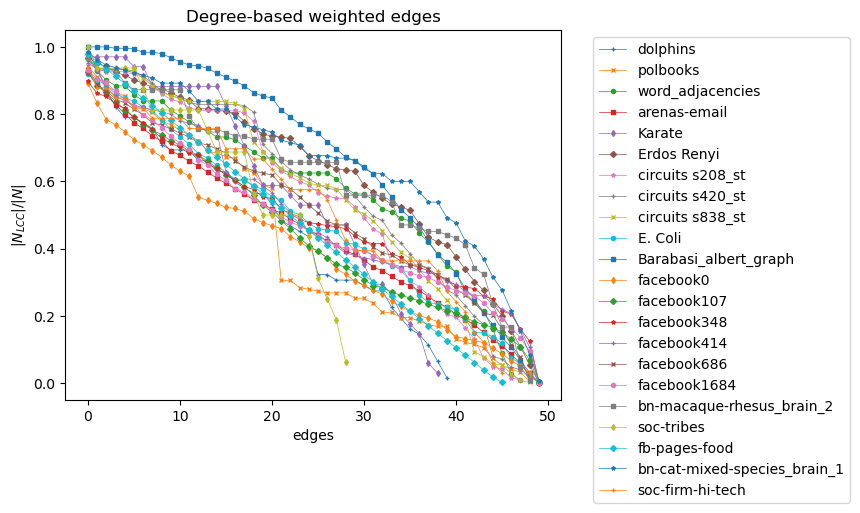

<Figure size 3840x2880 with 0 Axes>

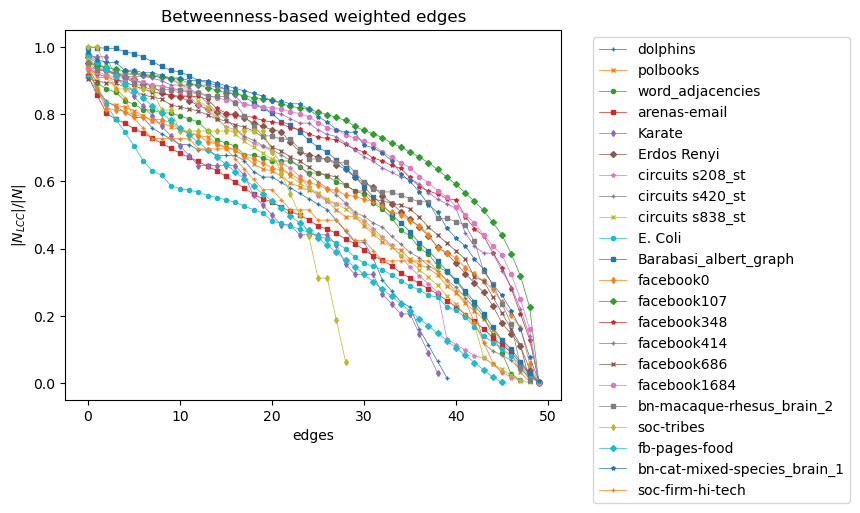

<Figure size 3840x2880 with 0 Axes>

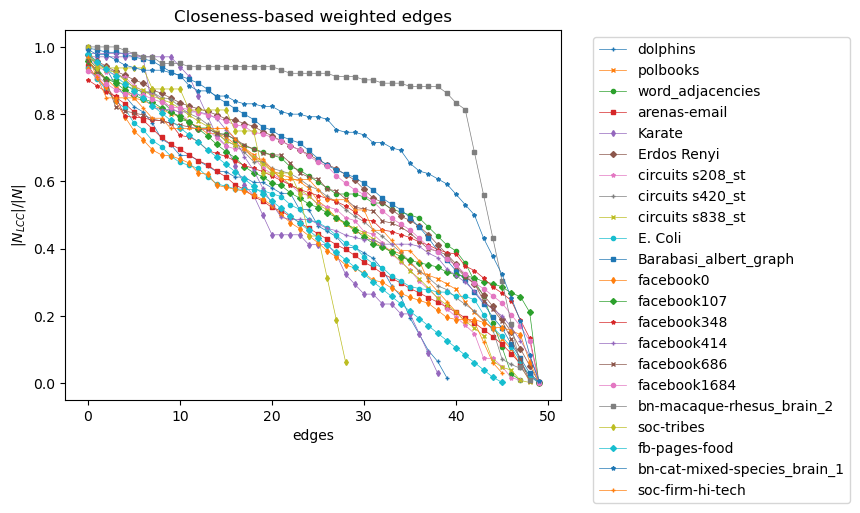

<Figure size 3840x2880 with 0 Axes>

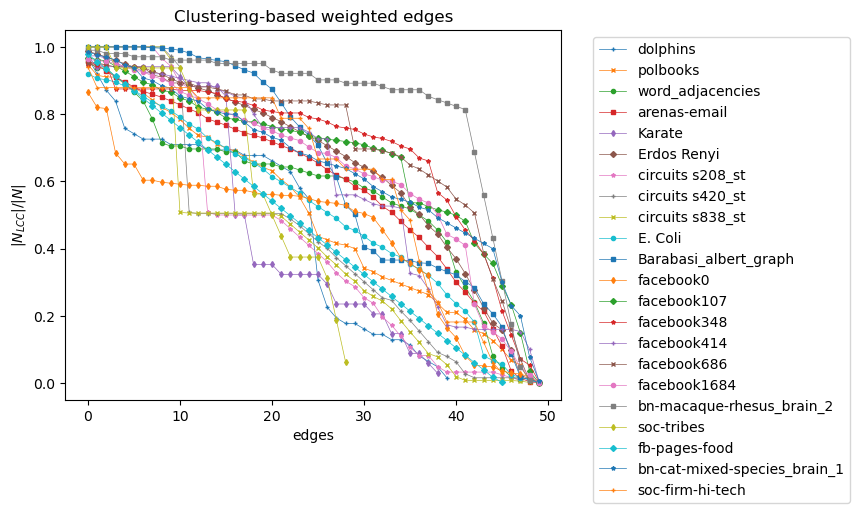

In [5]:
centralities = [nx.degree_centrality, nx.betweenness_centrality, nx.closeness_centrality, nx.clustering]
centr        = ['Degree'            ,   'Betweenness'          ,   'Closeness'          ,   'Clustering']
for i in range(4):
    plot(simulation(centralities[i]), centr[i])

<Figure size 3840x2880 with 0 Axes>

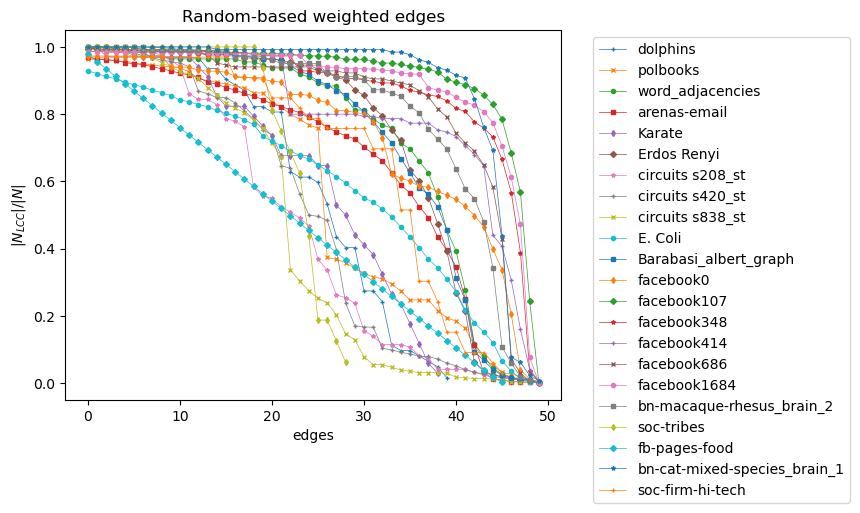

In [6]:
import random
def random_sim():
    results = []
    for network in networks.keys():
        G = nx.Graph()
        G = networks[network].copy()              # original network
        E = list(G.edges())
        random.shuffle(E)
        W = batch_list(E)
        batches = batch_list(W)
        newBatches = []
        for b in batches:
            newBatches.append(b[0])
        result = []
        for b in range(len(newBatches)):
            G.remove_edges_from(newBatches[b])            
            largest_component = G.subgraph(max(nx.connected_components(G), key=len))
            result.append([b, len(largest_component)/len(G)])
        results.append(result)
    return results
results = random_sim()
plot(results, 'Random')